In [6]:
import requests 
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
from urllib.request import urlopen

In [7]:
url = "https://www.redfin.com/state/California"

In [16]:
req_headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'authority': 'www.redfin.com',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36',
    'cookie': 'RF_BROWSER_ID=L60AjcauTBebcYlIR2U4kw; G_ENABLED_IDPS=google; searchMode=1; sortOrder=1; sortOption=special_blend; collapsedMapView=1; RF_BUSINESS_MARKET=2; g_state={"i_p":1664477071453,"i_l":3}; RF_LDP_VIEWS_FOR_PROMPT=%7B%22viewsData%22%3A%7B%2209-18-2022%22%3A%7B%22156376334%22%3A2%2C%22156597405%22%3A1%2C%22156758795%22%3A1%2C%22157099478%22%3A1%2C%22157135189%22%3A1%2C%22157151930%22%3A1%2C%22157161427%22%3A3%7D%2C%2209-19-2022%22%3A%7B%22153865147%22%3A1%2C%22157119319%22%3A2%2C%22157168473%22%3A1%7D%2C%2209-20-2022%22%3A%7B%22156448970%22%3A1%2C%22156904928%22%3A1%7D%2C%2209-22-2022%22%3A%7B%22157144246%22%3A1%2C%22157190844%22%3A2%2C%22157210293%22%3A1%2C%22157227537%22%3A1%2C%22157230771%22%3A1%2C%22157353619%22%3A1%7D%2C%2209-25-2022%22%3A%7B%22156936145%22%3A1%2C%22157527548%22%3A1%7D%7D%2C%22expiration%22%3A%222024-09-17T20%3A50%3A26.681Z%22%2C%22totalPromptedLdps%22%3A0%7D; RF_LISTING_VIEWS=156936145.157527548.157227537.157144246.157210293.157230771.157353619.157190844.156904928.156448970.157168473.157119319.153865147.156376334.157161427.157135189.157099478.156597405.156758795.157151930; RF_LAST_DP_SERVICE_REGION=1077; RF_LAST_SEARCHED_CITY=San%20Bruno; userPreferences=parcels%3Dtrue%26schools%3Dfalse%26mapStyle%3Ds%26statistics%3Dtrue%26agcTooltip%3Dfalse%26agentReset%3Dfalse%26ldpRegister%3Dfalse%26afCard%3D2%26schoolType%3D0%26lastSeenLdp%3DnoSharedSearchCookie%26viewedSwipeableHomeCardsDate%3D1664165946420; RF_UNBLOCK_ID=wCqEglla; AKA_A2=A; ak_bmsc=57A850EC50D2954AAA0419C6D177A935~000000000000000000000000000000~YAAQ0JTYF5ZIgpaDAQAAKIgDnxGfYe1YNwTJw6mekKkcE5nssQDSrdsUFiwwxWyVrpvyvhnhncenIYgSmII9TwxluJVvEbu/tSUA8+/x3EM6yHei8eKMGAMPKEXs+xIR8u8Hf3k6s3HacFNu1qkh2h07TrJvIDAWTDrhoL6OcfAp7/CbcwQpKp7Pocp2h2hPgkz67zj0Z3r9InkPnvnNRNIL/t3BvTDL2PxnQJrTfrkhfIaitiKoHeF7QwWsMq1j+SrBc5eTQTA9sbPGaAN+0EGk9EE+0jOrKIv8qAjdnUzUCee09zkdlDSciEsp6laLxBYdYn12Nzkg9hCdSyYLvDA3a4icF9GO7BpK21KF8H6nEnFOQZRKVVYNVkbYfLda7ywMou4gLIpI9pw=; RF_CORVAIR_LAST_VERSION=438.2.1; RF_BROWSER_ID_GREAT_FIRST_VISIT_TIMESTAMP=2022-10-03T11%3A02%3A37.559025; RF_BID_UPDATED=1; bm_mi=93FC1225292EA26E5BF28146B44094DB~YAAQ0JTYF/BLgpaDAQAAEp0DnxGHhDCs8mc21i2Dx+0ew80H+sc60/eEiX1lmxobxK/NRjrLVtcm4UEoauvXlXiAl8+Z1WaiNvLo0ZJBgCCZCvVxGCC2E3xVkl81ndIvalVW/U/d1nPOOK3XFuLTSWrMgBiny6GOOETBYHm6DyYPb6Ntoq3ksWcXw8DSuhJ4fDN85gYSsPLJyoEDoILSXl2rPCLSOtTso6GDk0IEcNImEr1HdWiaEtFTNl7iS5tE84eBj+2KFID+B1M+TNDpAaufrXq1HOIxe8WFuBLa/NRF56c9uco/l2df9ynZ~1; RF_LAST_NAV=1; audS=t; FEED_COUNT=%5B%2210%22%2C%22f%22%5D; RF_BROWSER_CAPABILITIES=%7B%22screen-size%22%3A3%2C%22events-touch%22%3Afalse%2C%22ios-app-store%22%3Afalse%2C%22google-play-store%22%3Afalse%2C%22ios-web-view%22%3Afalse%2C%22android-web-view%22%3Afalse%7D; RF_VISITED=true; bm_sv=CD12C71B261FDC72BDB3D61405E55061~YAAQ0JTYF+tRgpaDAQAALMcDnxHjrt/ADbihWy6+dkJ3T8DDBOsnmekzaIYfQH2v4SiuPvZn/+xxnjrtdCZj1SzNSp2A8btPLdYNYWPccr8pbh4DSGuhMicHQtxH7XKiD86A8B5aHIQMI2UqK9WWzXrmMahkEBOR9tsnLuclJZaMV/hkqs5qecN25o/+r+W+RB0TPyZnlYPGRveIs074kfnwyTc5f4VtAkgNANpBGqzow8WBIgKn5/C706Pl7R4n~1',
    'referer': 'https://www.redfin.com/',
    'sec-ch-ua': '"Google Chrome";v="105", "Not)A;Brand";v="8", "Chromium";v="105"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin'
}

In [17]:
# Send a GET request to the URL
response = requests.get(url, headers=req_headers)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

In [15]:
all_urls = [a['href'] for a in soup('a')  if a.has_attr('href')]
all_urls

['/',
 '/houses-near-me',
 '/rentals',
 '/feed',
 '/myredfin/favorites',
 '/premier',
 '/sell-a-home/seller-consultation/address?inquirySource=285',
 '/rentals/list-my-home-for-rent',
 'https://redfin.onelink.me/iy7h/?pid=redfin&af_channel=mobile-web-organic&c=mobile-menu',
 '/',
 '/myredfin/saved-searches',
 '/selling-options',
 '/myredfin/owner-dashboard',
 '/myredfin/openhouses',
 '/myredfin/tours',
 '/myredfin/agent',
 '/mortgage-menu',
 '/careers/real-estate',
 '/myredfin/alerts-settings',
 'tel:1-844-759-7732',
 'tel:1-844-759-7732',
 '/houses-near-me',
 '/rentals',
 '/why-sell?inquirySource=484',
 '/premier',
 '/mortgage-rates?context=3',
 '/real-estate-agents',
 '/feed',
 '/state/California/housing-market',
 'https://www.redfin.com/city/10940/CA/Long-Beach',
 'https://www.redfin.com/city/10940/CA/Long-Beach',
 'https://www.redfin.com/city/16904/CA/San-Diego',
 'https://www.redfin.com/city/16904/CA/San-Diego',
 'https://www.redfin.com/city/11203/CA/Los-Angeles',
 'https://www.re

In [18]:
regex = r"https://www.redfin.com/county/?"
good_urls = [url for url in all_urls if re.match(regex, url)]
good_urls = list(set(good_urls))
good_urls

['https://www.redfin.com/county/343/CA/San-Mateo-County',
 'https://www.redfin.com/county/321/CA/Los-Angeles-County',
 'https://www.redfin.com/county/351/CA/Sonoma-County',
 'https://www.redfin.com/county/358/CA/Ventura-County',
 'https://www.redfin.com/county/335/CA/Riverside-County',
 'https://www.redfin.com/county/303/CA/Alameda-County',
 'https://www.redfin.com/county/345/CA/Santa-Clara-County',
 'https://www.redfin.com/county/339/CA/San-Diego-County',
 'https://www.redfin.com/county/338/CA/San-Bernardino-County',
 'https://www.redfin.com/county/333/CA/Placer-County',
 'https://www.redfin.com/county/323/CA/Marin-County',
 'https://www.redfin.com/county/336/CA/Sacramento-County',
 'https://www.redfin.com/county/346/CA/Santa-Cruz-County',
 'https://www.redfin.com/county/309/CA/Contra-Costa-County',
 'https://www.redfin.com/county/332/CA/Orange-County']

In [21]:
req_county_lst = []
req_counties = ["Alameda-County","Santa-Clara-County","San-Mateo-County","Contra-Costa-County"]

# Filter all the required counties
for url in good_urls:
    if url.split("/")[6] in req_counties:
        req_county_lst.append(url)
req_county_lst

['https://www.redfin.com/county/343/CA/San-Mateo-County',
 'https://www.redfin.com/county/303/CA/Alameda-County',
 'https://www.redfin.com/county/345/CA/Santa-Clara-County',
 'https://www.redfin.com/county/309/CA/Contra-Costa-County']

In [23]:
req_county_link =[]

for link in req_county_lst:
    req_county_link.append(link)
    for i in range(2,15):
        req_county_link.append(link + '/page-' + str(i))
print(len(req_county_link))        
print(req_county_link)  

56
['https://www.redfin.com/county/343/CA/San-Mateo-County', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-2', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-3', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-4', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-5', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-6', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-7', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-8', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-9', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-10', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-11', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-12', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-13', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-14', 'https://www.redfin.com/county/303/CA/Alameda-County', 'https://www.redfin.com/county/303/CA/Alameda-C

In [13]:
properties = defaultdict(set) 

for url in bayarea_county_page_links:    
    county_name = re.findall('CA/([^/]+)',url) # key       
    text = requests.get(url, headers=req_headers).text
    soup = BS(text,'html5lib')     
    county_text = soup.find('div',attrs={'id':'results-display'}) 
    all_links = [a['href'] for a in county_text('a') if a.has_attr('href')] 
    regex = r"^/CA" 
    for link in all_links:
        if re.match(regex,link):
            mlink = "https://www.redfin.com" + link
            properties[county_name[0]].add(mlink)

print(len(properties))
print(properties)

4
defaultdict(<class 'set'>, {'Contra-Costa-County': {'https://www.redfin.com/CA/Clayton/1701-Trail-Ride-Rd-94517/home/167202213', 'https://www.redfin.com/CA/Richmond/6217-Bernhard-Ave-94805/home/1751430', 'https://www.redfin.com/CA/Walnut-Creek/203-Mayhew-Way-94597/home/799163', 'https://www.redfin.com/CA/Richmond/164-Lakeshore-Ct-94804/home/12128738', 'https://www.redfin.com/CA/Richmond/6151-Plymouth-Ave-94805/home/23155214', 'https://www.redfin.com/CA/Discovery-Bay/1727-Newport-Dr-94505/home/1864700', 'https://www.redfin.com/CA/Walnut-Creek/3041-Grey-Eagle-Dr-94595/home/167237090', 'https://www.redfin.com/CA/Concord/3112-Mt-Diablo-St-94518/home/1853806', 'https://www.redfin.com/CA/Brentwood/168-Davidson-Ct-94513/home/1633336', 'https://www.redfin.com/CA/Clayton/35-Eastbrook-Ct-94517/home/716494', 'https://www.redfin.com/CA/Discovery-Bay/4093-S-Anchor-Ct-94505/home/1551230', 'https://www.redfin.com/CA/Pittsburg/265-Balsam-St-94565/home/23317169', 'https://www.redfin.com/CA/Walnut-Cre

In [ ]:
# Creating empty lists for required parameters
State = []
County =[]
City = []
Street= []
Zipcode = []
Property_type = []
Status = []
Price = []
Year_built = []
Beds = []
Bath = []
Sqft = []
Acre=[]
Lot_area = []
HOA_due = []
School_score = []
Walk_score = []
Bike_score = []
Garage_availibility = []
Redfin_estimate = []

for county in properties:   
    
    
    for prop in properties[county]:  
        
        County.append(county)
        
        html_text = requests.get(prop,headers=req_headers).text
        soup = BS(html_text,'html5lib')
        
        try:
            state_value = soup.find('div',attrs={'class':'dp-subtext'}).text.split(', ')[1].split(' ')[0]
        except:
            state_value = np.nan
        State.append(state_value)
        
        
        try:
            city_value = soup.find('div',attrs={'class':'dp-subtext'}).text.split(', ')[0]
        except:
            city_value = np.nan
        City.append(city_value)
        
    
        try:
            street_value = soup.find('div',attrs={'class':'street-address'}).text.split(',')[0]
        except:
            street_value = np.nan
        Street.append(street_value)
        
     
        try:
            zipcode_value = soup.find('div',attrs={'class':'dp-subtext'}).text.split(', ')[-1].split(' ')[-1]
            
        except:
            zipcode_value = np.nan
        Zipcode.append(zipcode_value) 
        
        
        try:
            property_value = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            for tag in property_value:
                if(tag.span.text == 'Property Type'):
                    property_type_value = tag.find('span',attrs={'class':'content text-right'}).text
        except:
            property_type_value = np.nan
        Property_type.append(property_type_value)       
        
        
        
        try:
            status_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            status =''
            for tag in status_text:
                if(tag.span.text=='Status'):
                    status = tag.find('span',attrs={'class':'DefinitionFlyoutLink inline-block underline clickable'})
                    if status == None:
                        status = tag.find('span',attrs={'class':'content text-right'})
        except:
            status=np.nan
        Status.append(status.text)     
        
        
        
        try:
            price_value = soup.find('div',attrs={'class':'statsValue'}).text.split('$')[1]
        except:
            price_value = np.nan
        Price.append(price_value)
        
        
        try:
            year_built_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            for tag in year_built_text:
                if(tag.span.text=='Year Built'):
                    year_built_value = int(tag.find('span',attrs={'class':'content text-right'}).text)
        except:
            year_built_value = np.nan
        Year_built.append(year_built_value)
                
        
        try:
            bed_value_str = soup.find('div',attrs={'data-rf-test-id':'abp-beds'}).text.split('B')[0]
            bed_value = int(bed_value_str)
        except:
            bed_value=np.nan
        Beds.append(bed_value)
        
        
        try:
            bath_value_str =soup.find('div',attrs ={'data-rf-test-id':'abp-baths'}).text.split('B')[0]
            bath_value = float(bath_value_str)
        except:
            bath_value = np.nan
        Bath.append(bath_value)
        
        
        try:
            sqft_value_str =soup.find('div',attrs ={'data-rf-test-id':'abp-sqFt'}).text.split('S')[0].replace(',','')
            sqft_value = float(sqft_value_str)
        except:
            sqft_value=np.nan
        Sqft.append(sqft_value)
        
        
        try:
            acre_value =soup.find('div',attrs ={'class':'stat-block sqft-section'}).text.split('A')[0]
        except:
            acre_value=np.nan
        Acre.append(acre_value)
        
        
        try:
            lot_prop_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            for tag in lot_prop_text:
                if(tag.span.text=='Lot Size'):
                    lot_area_value = tag.find('span',attrs={'class':'content text-right'}).text
        except:
            lot_area_value = np.nan
        Lot_area.append(lot_area_value)
        
        
        
        try:
            hoa_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            hoa_due_value =''
            for tag in hoa_text:
                if(tag.span.text=='HOA Dues'):
                    hoa_due_value = tag.find('span',attrs={'class':'content text-right'}).text
        except:
            hoa_due_value = np.nan
        HOA_due.append(hoa_due_value)
        
        
        
        try:
            school_rating = max([rating.text[0] for rating in soup.findAll('div',attrs ={'class':'gs-rating-text'})])
        except:
            school_rating = np.nan
            
        School_score.append(school_rating)        
        
                
        
        try:
            walk_score_value = int(soup.find('div',attrs={'class':'transport-icon-and-percentage walkscore'}).text.split(' /')[0])
        except:
            walk_score_value = np.nan
        Walk_score.append(walk_score_value)
        
        
        
        try:
            bike_score_value = int(soup.find('div',attrs={'class':'transport-icon-and-percentage bikescore'}).text.split(' /')[0])
        except:
            bike_score_value = np.nan
        Bike_score.append(bike_score_value)
        

        
        try:
            garage_aval = soup.findAll('span',attrs={'class':'entryItemContent'})
            for tag in garage_aval:
                if("Garage" in tag.text):
                    value = 'Yes'
                    break
                else:    
                    value = 'No'
        except:   
             value = np.nan
        Garage_availibility.append(value)
        
        
        
        try:
            redfin_estimate_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            redfin_estimate_value =''
            for tag in redfin_estimate_text:
                if(tag.span.text =='Redfin Estimate'):
                    redfin_estimate_value = tag.find('span',attrs={'class':'content text-right'}).text.split('$')[1]
        except:
            redfin_estimate_value=np.nan
        Redfin_estimate.append(redfin_estimate_value)
        
        

In [12]:
df=pd.DataFrame(data={'State':State,'County':County,
                      'City':City,'Street':Street,
                      'Zipcode':Zipcode,'Property_Type':Property_type,
                      'Status':Status,
                      'Price':Price,'Year_Built':Year_built,
                      'Beds':Beds,'Bath':Bath,'Sqft':Sqft,'Acre':Acre,
                      'Lot Area':Lot_area,'HOA Due':HOA_due,'School_rating':School_score,
                      'WalkScore':Walk_score,'Bike_Score':Bike_score,
                      'Garage_availability':Garage_availibility,
                      'Redfin_estimate':Redfin_estimate
                      
})                     

In [13]:
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Acre,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,CA,Contra-Costa-County,Oakley,2537 Talaria Dr,94561,Single Family Residential,Back On Market,"649,999",2014,3.0,2.5,2279.0,"2,279Sq Ft","6,228 Sq. Ft.",$114/month,6,6,35.0,Yes,"655,836"
1,CA,Contra-Costa-County,Pleasant Hill,66 Kathryn Dr,94523,Single Family Residential,Price Change,"998,000",1952,3.0,1.0,1315.0,"1,315Sq Ft","6,650 Sq. Ft.",,8,83,76.0,Yes,"1,048,496"
2,CA,Contra-Costa-County,San Ramon,3246 Ensenada Dr,94583,Single Family Residential,New,"1,395,000",1976,4.0,2.5,1880.0,"1,880Sq Ft","7,000 Sq. Ft.",,9,26,67.0,Yes,"1,413,765"
3,CA,Contra-Costa-County,Lafayette,1845 Reliez Valley Rd,94549,Single Family Residential,Active,"1,848,888",1934,5.0,3.5,2733.0,"2,733Sq Ft",0.87 Acres,,9,4,3.0,Yes,"1,861,281"
4,CA,Contra-Costa-County,Orinda,40 Via Floreado,94563,Single Family Residential,New,"2,150,000",1926,5.0,3.5,2516.0,"2,516Sq Ft",0.50 Acres,,9,1,4.0,Yes,"2,152,108"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,CA,San-Mateo-County,REDWOOD CITY,327 G St,94063,Single Family Home,Active,"1,649,000",1951,3.0,2.0,1244.0,"1,244Sq Ft","5,876 Sq. Ft.",,9,65,81.0,Yes,"1,674,965"
1229,CA,San-Mateo-County,HILLSBOROUGH,5 Jewell Pl,94010,Single Family Home,Active,"4,888,000",1965,3.0,3.0,2890.0,"2,890Sq Ft",0.62 Acres,,9,1,2.0,Yes,"4,889,102"
1230,CA,San-Mateo-County,BELMONT,3322 Plateau Dr,94002,Single Family Home,Active,"2,488,000",1966,6.0,3.0,2240.0,"2,240Sq Ft","10,290 Sq. Ft.",,9,9,19.0,Yes,"2,463,021"
1231,CA,San-Mateo-County,San Mateo,102 Waters Park Cir,94403,Townhouse,New,"1,463,917",2021,2.0,2.5,1602.0,"1,602Sq Ft","10,290 Sq. Ft.",$350/month,7,48,75.0,Yes,"1,462,581"


In [ ]:
df.to_csv('Data_before_cleaning.csv')

In [16]:
#Data cleaning

In [17]:
(df['Beds'].isna() & df['Bath'].isna()).sum()

38

In [18]:
#If both beds and Bath have null values -> that indicates that the property is an empty land and there is no
#built house. We will drop such rows

In [19]:
df = df.dropna(subset=['Beds', 'Bath'],how='all')

In [20]:
#Replacing Bike_Score null values as 0

In [21]:
df['Bike_Score'].fillna(0,inplace=True)

/Users/neenujose/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
#We have removed properties where both beds and baths are 0
#To deal with remaining null values in Individual columns of Beds & Baths, we will replace it with 0 since 
#that means there is either no bedroom or not bathroom in that property

In [23]:
df['Beds'].fillna(0,inplace=True)
df['Bath'].fillna(0,inplace=True)

In [24]:
df.isna().sum()

State                  0
County                 0
City                   0
Street                 0
Zipcode                0
Property_Type          0
Status                 0
Price                  0
Year_Built             0
Beds                   0
Bath                   0
Sqft                   2
Acre                   0
Lot Area               0
HOA Due                0
School_rating          9
WalkScore              0
Bike_Score             0
Garage_availability    0
Redfin_estimate        0
dtype: int64

In [25]:
#deleting rows where sqft is not provided(null) since sqft is a part of our analysis

In [26]:
df=df.dropna(subset=['Sqft'])

In [27]:
#Removing special characters in columns(Price, Redfin_estimate, School_rating, Year_Built, HOA Due, Lot Area ) 
#and converting datatypes into relevant datatypes

In [28]:
df['Price'] = df['Price'].astype(str).str.replace(',','')
df['Price'] = df['Price'].astype(float)

In [29]:
#df['Redfin_estimate'] = df['Redfin_estimate'].apply(lambda x: 0 if str(x) == ',' else x)
df['Redfin_estimate'] = df['Redfin_estimate'].astype(str).str.replace(',','')
df['Redfin_estimate'] = df['Redfin_estimate'].apply(lambda x: 0 if str(x) == '' else x)
df['Redfin_estimate'].fillna(0,inplace=True)
df['Redfin_estimate'] = df['Redfin_estimate'].astype(float)

In [30]:
df['School_rating'] = df['School_rating'].apply(lambda x: 0 if str(x) == '-' else x)
df['School_rating'].fillna(0,inplace=True)
df['School_rating'] = df['School_rating'].astype(int)

In [31]:
df['Year_Built'].fillna(0,inplace=True)
df['Year_Built'] = df['Year_Built'].astype(int)

In [32]:
df['HOA Due'] = df['HOA Due'].str.replace(',','')
df['HOA Due'] = df['HOA Due'].str.replace('$','')
df['HOA Due'] = df['HOA Due'].str.replace('/month','')
df['HOA Due'] = df['HOA Due'].apply(lambda x: 0 if str(x) == '' else x)
df['HOA Due'].fillna(0,inplace=True)
df['HOA Due'] = df['HOA Due'].astype(float)

/var/folders/6y/5vsy8lk50_nggsg92tkybjmm0000gn/T/ipykernel_1055/586923046.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['HOA Due'] = df['HOA Due'].str.replace('$','')


In [33]:
df['Lot Area'].fillna(0,inplace=True)
df['Lot Area'] = df['Lot Area'].str.replace(',','')
df['Lot Area'] = df['Lot Area'].str.replace('Sq. Ft.','')
df['Lot Area'] = df['Lot Area'].apply(lambda x: float(str(x)[:-6])*43560 if str(x)[-5:] == 'Acres' else (float(str(x)[:-5]) if str(x)[-4:] == 'Acre' else x))
df['Lot Area'] = df['Lot Area'].apply(lambda x: 0 if str(x) == '' else x)
df['Lot Area'] = df['Lot Area'].astype(float)

/var/folders/6y/5vsy8lk50_nggsg92tkybjmm0000gn/T/ipykernel_1055/224277968.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Lot Area'] = df['Lot Area'].str.replace('Sq. Ft.','')


In [ ]:
#dropping the acre column. It was only used to identify the values where we do not have sqft

In [34]:
df=df.drop(columns=['Acre'])

In [35]:
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,CA,Contra-Costa-County,Oakley,2537 Talaria Dr,94561,Single Family Residential,Back On Market,649999.0,2014,3.0,2.5,2279.0,6228.0,114.0,6,6,35.0,Yes,655836.0
1,CA,Contra-Costa-County,Pleasant Hill,66 Kathryn Dr,94523,Single Family Residential,Price Change,998000.0,1952,3.0,1.0,1315.0,6650.0,0.0,8,83,76.0,Yes,1048496.0
2,CA,Contra-Costa-County,San Ramon,3246 Ensenada Dr,94583,Single Family Residential,New,1395000.0,1976,4.0,2.5,1880.0,7000.0,0.0,9,26,67.0,Yes,1413765.0
3,CA,Contra-Costa-County,Lafayette,1845 Reliez Valley Rd,94549,Single Family Residential,Active,1848888.0,1934,5.0,3.5,2733.0,37897.2,0.0,9,4,3.0,Yes,1861281.0
4,CA,Contra-Costa-County,Orinda,40 Via Floreado,94563,Single Family Residential,New,2150000.0,1926,5.0,3.5,2516.0,21780.0,0.0,9,1,4.0,Yes,2152108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,CA,San-Mateo-County,REDWOOD CITY,327 G St,94063,Single Family Home,Active,1649000.0,1951,3.0,2.0,1244.0,5876.0,0.0,9,65,81.0,Yes,1674965.0
1229,CA,San-Mateo-County,HILLSBOROUGH,5 Jewell Pl,94010,Single Family Home,Active,4888000.0,1965,3.0,3.0,2890.0,27007.2,0.0,9,1,2.0,Yes,4889102.0
1230,CA,San-Mateo-County,BELMONT,3322 Plateau Dr,94002,Single Family Home,Active,2488000.0,1966,6.0,3.0,2240.0,10290.0,0.0,9,9,19.0,Yes,2463021.0
1231,CA,San-Mateo-County,San Mateo,102 Waters Park Cir,94403,Townhouse,New,1463917.0,2021,2.0,2.5,1602.0,10290.0,350.0,7,48,75.0,Yes,1462581.0


In [36]:
df=df.reset_index()

In [37]:
df=df.drop(columns=['index'])

In [38]:
df.dtypes

State                   object
County                  object
City                    object
Street                  object
Zipcode                 object
Property_Type           object
Status                  object
Price                  float64
Year_Built               int64
Beds                   float64
Bath                   float64
Sqft                   float64
Lot Area               float64
HOA Due                float64
School_rating            int64
WalkScore                int64
Bike_Score             float64
Garage_availability     object
Redfin_estimate        float64
dtype: object

In [39]:
#Normalization

In [40]:
df['Street']=df['Street'].apply(lambda x:x[0]+x[1:].lower())

In [41]:
df['City']=df['City'].apply(lambda x:x[0]+x[1:].lower())

In [42]:
df['State']=df['State'].apply(lambda x:x[0]+x[1:].lower())

In [43]:
df['Property_Type']=df['Property_Type'].apply(lambda x:x[0]+x[1:].lower())

In [44]:
df['Status']=df['Status'].apply(lambda x:x[0]+x[1:].lower())

In [45]:
df['Garage_availability']=df['Garage_availability'].apply(lambda x:x[0]+x[1:].lower())

In [46]:
df['County']=df['County'].apply(lambda x:x[0]+x[1:].lower())

In [47]:
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Contra-costa-county,Oakley,2537 talaria dr,94561,Single family residential,Back on market,649999.0,2014,3.0,2.5,2279.0,6228.0,114.0,6,6,35.0,Yes,655836.0
1,Ca,Contra-costa-county,Pleasant hill,66 kathryn dr,94523,Single family residential,Price change,998000.0,1952,3.0,1.0,1315.0,6650.0,0.0,8,83,76.0,Yes,1048496.0
2,Ca,Contra-costa-county,San ramon,3246 ensenada dr,94583,Single family residential,New,1395000.0,1976,4.0,2.5,1880.0,7000.0,0.0,9,26,67.0,Yes,1413765.0
3,Ca,Contra-costa-county,Lafayette,1845 reliez valley rd,94549,Single family residential,Active,1848888.0,1934,5.0,3.5,2733.0,37897.2,0.0,9,4,3.0,Yes,1861281.0
4,Ca,Contra-costa-county,Orinda,40 via floreado,94563,Single family residential,New,2150000.0,1926,5.0,3.5,2516.0,21780.0,0.0,9,1,4.0,Yes,2152108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,Ca,San-mateo-county,Redwood city,327 g st,94063,Single family home,Active,1649000.0,1951,3.0,2.0,1244.0,5876.0,0.0,9,65,81.0,Yes,1674965.0
1189,Ca,San-mateo-county,Hillsborough,5 jewell pl,94010,Single family home,Active,4888000.0,1965,3.0,3.0,2890.0,27007.2,0.0,9,1,2.0,Yes,4889102.0
1190,Ca,San-mateo-county,Belmont,3322 plateau dr,94002,Single family home,Active,2488000.0,1966,6.0,3.0,2240.0,10290.0,0.0,9,9,19.0,Yes,2463021.0
1191,Ca,San-mateo-county,San mateo,102 waters park cir,94403,Townhouse,New,1463917.0,2021,2.0,2.5,1602.0,10290.0,350.0,7,48,75.0,Yes,1462581.0


In [ ]:
#Removing Duplicates

In [48]:
df.duplicated().value_counts()

False    1193
dtype: int64

In [49]:
df=df.drop_duplicates()

In [50]:
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Contra-costa-county,Oakley,2537 talaria dr,94561,Single family residential,Back on market,649999.0,2014,3.0,2.5,2279.0,6228.0,114.0,6,6,35.0,Yes,655836.0
1,Ca,Contra-costa-county,Pleasant hill,66 kathryn dr,94523,Single family residential,Price change,998000.0,1952,3.0,1.0,1315.0,6650.0,0.0,8,83,76.0,Yes,1048496.0
2,Ca,Contra-costa-county,San ramon,3246 ensenada dr,94583,Single family residential,New,1395000.0,1976,4.0,2.5,1880.0,7000.0,0.0,9,26,67.0,Yes,1413765.0
3,Ca,Contra-costa-county,Lafayette,1845 reliez valley rd,94549,Single family residential,Active,1848888.0,1934,5.0,3.5,2733.0,37897.2,0.0,9,4,3.0,Yes,1861281.0
4,Ca,Contra-costa-county,Orinda,40 via floreado,94563,Single family residential,New,2150000.0,1926,5.0,3.5,2516.0,21780.0,0.0,9,1,4.0,Yes,2152108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,Ca,San-mateo-county,Redwood city,327 g st,94063,Single family home,Active,1649000.0,1951,3.0,2.0,1244.0,5876.0,0.0,9,65,81.0,Yes,1674965.0
1189,Ca,San-mateo-county,Hillsborough,5 jewell pl,94010,Single family home,Active,4888000.0,1965,3.0,3.0,2890.0,27007.2,0.0,9,1,2.0,Yes,4889102.0
1190,Ca,San-mateo-county,Belmont,3322 plateau dr,94002,Single family home,Active,2488000.0,1966,6.0,3.0,2240.0,10290.0,0.0,9,9,19.0,Yes,2463021.0
1191,Ca,San-mateo-county,San mateo,102 waters park cir,94403,Townhouse,New,1463917.0,2021,2.0,2.5,1602.0,10290.0,350.0,7,48,75.0,Yes,1462581.0


In [51]:
df.kurt(numeric_only=True)

Price               115.210649
Year_Built           -0.428832
Beds                  4.093592
Bath                  4.434679
Sqft                 17.545597
Lot Area           1034.096255
HOA Due             106.361076
School_rating         0.067668
WalkScore            -1.205246
Bike_Score           -0.412292
Redfin_estimate     115.757196
dtype: float64

In [52]:
df['Price'].describe()

count    1.193000e+03
mean     1.493836e+06
std      1.690104e+06
min      9.000000e+04
25%      7.000000e+05
50%      1.048888e+06
75%      1.795000e+06
max      3.195000e+07
Name: Price, dtype: float64

In [53]:
df['Beds'].describe()

count    1193.000000
mean        3.279966
std         1.256023
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: Beds, dtype: float64

In [54]:
df['Bath'].describe()

count    1193.000000
mean        2.381391
std         1.072055
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Bath, dtype: float64

In [55]:
df['Sqft'].describe()

count     1193.000000
mean      1969.083822
std       1181.828598
min        375.000000
25%       1204.000000
50%       1705.000000
75%       2406.000000
max      13825.000000
Name: Sqft, dtype: float64

In [56]:
df['HOA Due'].describe()

count    1193.000000
mean      158.766974
std       405.493186
min         0.000000
25%         0.000000
50%         0.000000
75%       214.000000
max      6545.000000
Name: HOA Due, dtype: float64

In [57]:
df['Lot Area'].describe()

count    1.193000e+03
mean     4.005982e+04
std      5.922061e+05
min      1.000000e+00
25%      4.794000e+03
50%      6.400000e+03
75%      1.000000e+04
max      1.975010e+07
Name: Lot Area, dtype: float64

In [58]:
df['Redfin_estimate'].describe()

count    1.193000e+03
mean     1.356406e+06
std      1.590475e+06
min      0.000000e+00
25%      6.263230e+05
50%      9.692350e+05
75%      1.674965e+06
max      3.078192e+07
Name: Redfin_estimate, dtype: float64

In [ ]:
#Detecting Outliers

<AxesSubplot:xlabel='Price'>

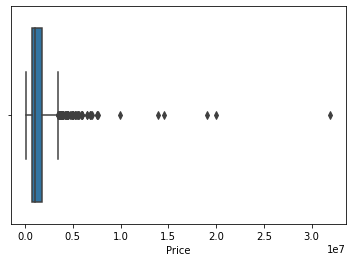

In [59]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='Beds'>

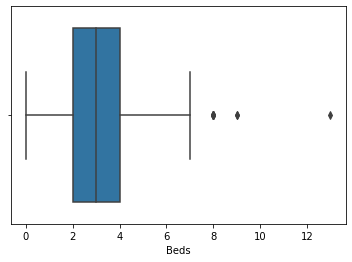

In [60]:
sns.boxplot(x=df['Beds'])

<AxesSubplot:xlabel='Bath'>

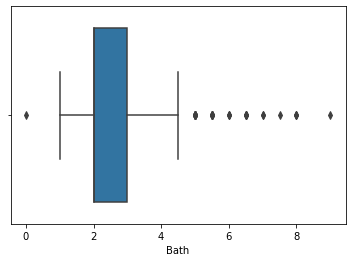

In [61]:
sns.boxplot(x=df['Bath'])

<AxesSubplot:xlabel='Sqft'>

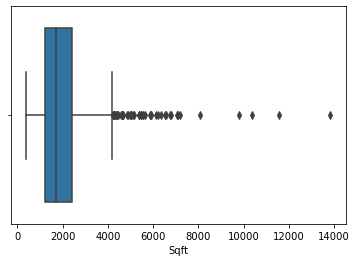

In [62]:
sns.boxplot(x=df['Sqft'])

<AxesSubplot:xlabel='HOA Due'>

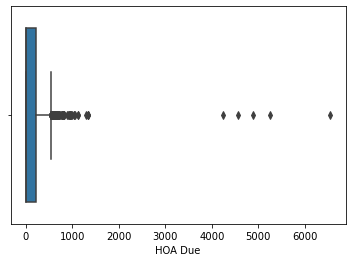

In [63]:
sns.boxplot(x=df['HOA Due'])

<AxesSubplot:xlabel='Lot Area'>

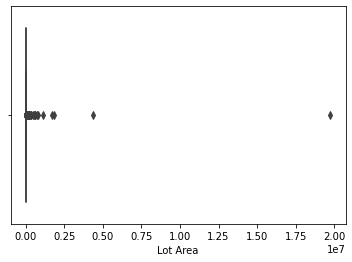

In [64]:
sns.boxplot(x=df['Lot Area'])

<AxesSubplot:xlabel='Redfin_estimate'>

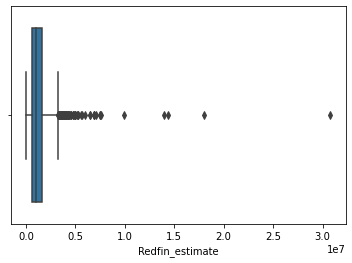

In [65]:
sns.boxplot(x=df['Redfin_estimate'])

In [66]:
Q1_Price = df['Price'].quantile(0.25)
Q3_Price = df['Price'].quantile(0.75)
IQR_Price = Q3_Price - Q1_Price
IQR_Price

1095000.0

In [67]:
Q1_Beds = df['Beds'].quantile(0.25)
Q3_Beds = df['Beds'].quantile(0.75)
IQR_Beds = Q3_Beds - Q1_Beds
IQR_Beds

2.0

In [68]:
Q1_Bath = df['Bath'].quantile(0.25)
Q3_Bath = df['Bath'].quantile(0.75)
IQR_Bath = Q3_Bath - Q1_Bath
IQR_Bath

1.0

In [69]:
Q1_Sqft = df['Sqft'].quantile(0.25)
Q3_Sqft = df['Sqft'].quantile(0.75)
IQR_Sqft = Q3_Sqft - Q1_Sqft
IQR_Sqft

1202.0

In [70]:
Q1_HOA = df['HOA Due'].quantile(0.25)
Q3_HOA = df['HOA Due'].quantile(0.75)
IQR_HOA = Q3_HOA - Q1_HOA
IQR_HOA

214.0

In [71]:
Q1_LotArea = df['Lot Area'].quantile(0.25)
Q3_LotArea = df['Lot Area'].quantile(0.75)
IQR_LotArea = Q3_LotArea - Q1_LotArea
IQR_LotArea

5206.0

In [72]:
Q1_RedfinEstimate = df['Redfin_estimate'].quantile(0.25)
Q3_RedfinEstimate = df['Redfin_estimate'].quantile(0.75)
IQR_RedfinEstimate = Q3_RedfinEstimate - Q1_RedfinEstimate
IQR_RedfinEstimate

1048642.0

In [73]:
df['Price'] = df['Price'][~((df['Price'] < (Q1_Price - 1.5 * IQR_Price)) |(df['Price'] > 
                                                                           (Q3_Price + 1.5 * IQR_Price)))]

In [74]:
df['Beds'] = df['Beds'][~((df['Beds'] < (Q1_Beds - 1.5 * IQR_Beds)) |(df['Beds'] > 
                                                                           (Q3_Beds + 1.5 * IQR_Beds)))]

In [75]:
df['Bath'] = df['Bath'][~((df['Bath'] < (Q1_Bath - 1.5 * IQR_Bath)) |(df['Bath'] > 
                                                                           (Q3_Bath + 1.5 * IQR_Bath)))]

In [76]:
df['Sqft'] = df['Sqft'][~((df['Sqft'] < (Q1_Sqft - 1.5 * IQR_Sqft)) |(df['Sqft'] > 
                                                                           (Q3_Sqft + 1.5 * IQR_Sqft)))]

In [77]:
df['HOA Due'] = df['HOA Due'][~((df['HOA Due'] < (Q1_HOA - 1.5 * IQR_HOA)) |(df['HOA Due'] > 
                                                                           (Q3_HOA + 1.5 * IQR_HOA)))]

In [78]:
df['Lot Area'] = df['Lot Area'][~((df['Lot Area'] < (Q1_LotArea - 1.5 * IQR_LotArea)) |(df['Lot Area'] > 
                                                                           (Q3_LotArea + 1.5 * IQR_LotArea)))]

In [79]:
df['Redfin_estimate'] = df['Redfin_estimate'][~((df['Redfin_estimate'] < (Q1_RedfinEstimate - 1.5 * IQR_RedfinEstimate)) |(df['Redfin_estimate'] > 
                                                                           (Q3_RedfinEstimate + 1.5 * IQR_RedfinEstimate)))]

In [80]:
df.isna().sum() #number of outliers removed

State                    0
County                   0
City                     0
Street                   0
Zipcode                  0
Property_Type            0
Status                   0
Price                   71
Year_Built               0
Beds                    11
Bath                    35
Sqft                    49
Lot Area               161
HOA Due                107
School_rating            0
WalkScore                0
Bike_Score               0
Garage_availability      0
Redfin_estimate         77
dtype: int64

In [81]:
df = df.dropna() #removing the null values. The outliers were removed and replaced by null values
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Contra-costa-county,Oakley,2537 talaria dr,94561,Single family residential,Back on market,649999.0,2014,3.0,2.5,2279.0,6228.0,114.0,6,6,35.0,Yes,655836.0
1,Ca,Contra-costa-county,Pleasant hill,66 kathryn dr,94523,Single family residential,Price change,998000.0,1952,3.0,1.0,1315.0,6650.0,0.0,8,83,76.0,Yes,1048496.0
2,Ca,Contra-costa-county,San ramon,3246 ensenada dr,94583,Single family residential,New,1395000.0,1976,4.0,2.5,1880.0,7000.0,0.0,9,26,67.0,Yes,1413765.0
5,Ca,Contra-costa-county,Rodeo,30 london ln,94572,Single family residential,New,1249000.0,2022,4.0,3.5,2996.0,4850.0,0.0,0,4,8.0,Yes,0.0
7,Ca,Contra-costa-county,Pittsburg,153 shannon,94565,Mobile/manufactured home,Active,159900.0,2022,2.0,1.0,720.0,8760.0,0.0,5,7,30.0,Yes,160645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,Ca,San-mateo-county,East palo alto,332 azalia dr,94303,Single family home,Active,1100000.0,1951,3.0,2.0,1130.0,5000.0,0.0,7,47,76.0,Yes,1098562.0
1188,Ca,San-mateo-county,Redwood city,327 g st,94063,Single family home,Active,1649000.0,1951,3.0,2.0,1244.0,5876.0,0.0,9,65,81.0,Yes,1674965.0
1190,Ca,San-mateo-county,Belmont,3322 plateau dr,94002,Single family home,Active,2488000.0,1966,6.0,3.0,2240.0,10290.0,0.0,9,9,19.0,Yes,2463021.0
1191,Ca,San-mateo-county,San mateo,102 waters park cir,94403,Townhouse,New,1463917.0,2021,2.0,2.5,1602.0,10290.0,350.0,7,48,75.0,Yes,1462581.0


In [ ]:
#Boxplot after removing outliers

<AxesSubplot:xlabel='Price'>

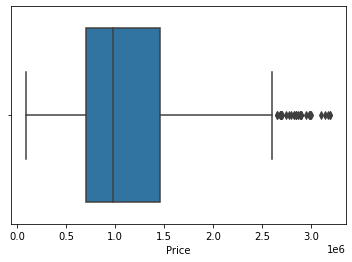

In [82]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='Beds'>

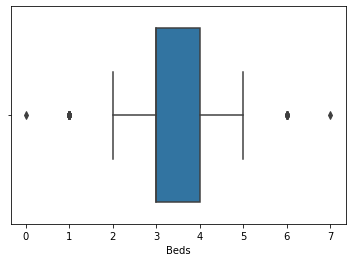

In [83]:
sns.boxplot(x=df['Beds'])

<AxesSubplot:xlabel='Bath'>

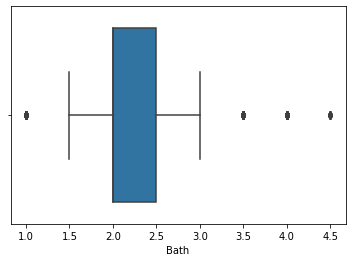

In [84]:
sns.boxplot(x=df['Bath'])

<AxesSubplot:xlabel='Sqft'>

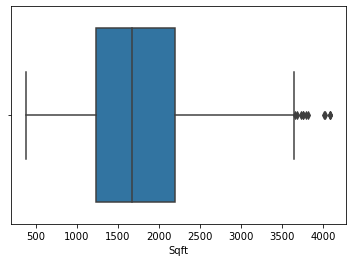

In [85]:
sns.boxplot(x=df['Sqft'])

<AxesSubplot:xlabel='HOA Due'>

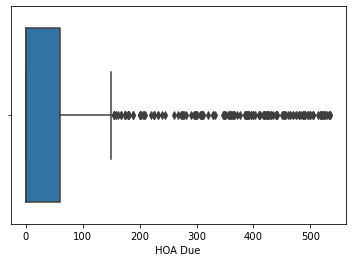

In [86]:
sns.boxplot(x=df['HOA Due'])

<AxesSubplot:xlabel='Lot Area'>

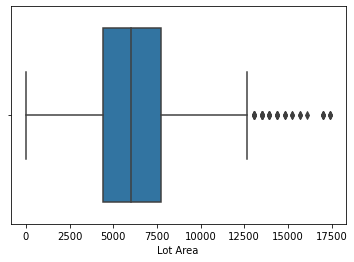

In [87]:
sns.boxplot(x=df['Lot Area'])

<AxesSubplot:xlabel='Redfin_estimate'>

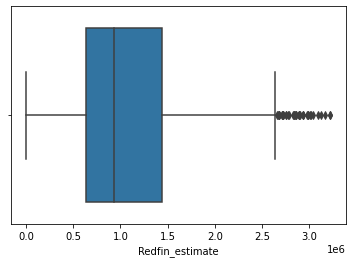

In [88]:
sns.boxplot(x=df['Redfin_estimate'])

In [89]:
#Exporting to csv

In [90]:
df.to_csv('Dataset_AfterDataCleaningFinal.csv',index=False)

In [91]:
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Contra-costa-county,Oakley,2537 talaria dr,94561,Single family residential,Back on market,649999.0,2014,3.0,2.5,2279.0,6228.0,114.0,6,6,35.0,Yes,655836.0
1,Ca,Contra-costa-county,Pleasant hill,66 kathryn dr,94523,Single family residential,Price change,998000.0,1952,3.0,1.0,1315.0,6650.0,0.0,8,83,76.0,Yes,1048496.0
2,Ca,Contra-costa-county,San ramon,3246 ensenada dr,94583,Single family residential,New,1395000.0,1976,4.0,2.5,1880.0,7000.0,0.0,9,26,67.0,Yes,1413765.0
5,Ca,Contra-costa-county,Rodeo,30 london ln,94572,Single family residential,New,1249000.0,2022,4.0,3.5,2996.0,4850.0,0.0,0,4,8.0,Yes,0.0
7,Ca,Contra-costa-county,Pittsburg,153 shannon,94565,Mobile/manufactured home,Active,159900.0,2022,2.0,1.0,720.0,8760.0,0.0,5,7,30.0,Yes,160645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,Ca,San-mateo-county,East palo alto,332 azalia dr,94303,Single family home,Active,1100000.0,1951,3.0,2.0,1130.0,5000.0,0.0,7,47,76.0,Yes,1098562.0
1188,Ca,San-mateo-county,Redwood city,327 g st,94063,Single family home,Active,1649000.0,1951,3.0,2.0,1244.0,5876.0,0.0,9,65,81.0,Yes,1674965.0
1190,Ca,San-mateo-county,Belmont,3322 plateau dr,94002,Single family home,Active,2488000.0,1966,6.0,3.0,2240.0,10290.0,0.0,9,9,19.0,Yes,2463021.0
1191,Ca,San-mateo-county,San mateo,102 waters park cir,94403,Townhouse,New,1463917.0,2021,2.0,2.5,1602.0,10290.0,350.0,7,48,75.0,Yes,1462581.0
